In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_training = pd.read_csv('train.csv')
dataset_testing = pd.read_csv('test.csv')

In [3]:
IDtest = dataset_testing['PassengerId']

In [4]:
dataset_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset_testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
dataset_training.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [5]:
percent_missing_training = (dataset_training.isnull().sum()/dataset_training.isnull().count())*100
print(round(percent_missing_training.sort_values(ascending=False), 2))

Cabin          77.10
Age            19.87
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64


In [7]:
dataset_testing.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [8]:
percent_missing_testing = (dataset_testing.isnull().sum()/dataset_testing.isnull().count())*100
print( round(percent_missing_testing.sort_values(ascending=False) , 2) )

Cabin          78.23
Age            20.57
Fare            0.24
Embarked        0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
PassengerId     0.00
dtype: float64


In [9]:
dataset_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
dataset_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
dataset_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
dataset_testing.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
#outlier detection
from collections import Counter
def outlier_detection(df, n, features):
    outlier_indices = []
    
    for col in features:
        #1st quartile
        Q1 = np.percentile(df[col], 25)
        
        #3rd quartile
        Q3 = np.percentile(df[col], 75)
        
        #interquartile range
        IQR = Q3 - Q1
        
        #outlier ste
        outlier_step = 1.5*IQR
        
        #outliers_list_index
        outliers_list_index = df[(df[col]< Q1-outlier_step) | (df[col]> Q3+outlier_step)].index
        
        #outlier indices
        outlier_indices.extend(outliers_list_index)
        
    outlier_indices = Counter(outlier_indices)
        
    #select observation containing more than 2 outliers
    multiple_outliers = list( k for k,v in outlier_indices.items() if v>n)
        
    return multiple_outliers

outliers_to_drop = outlier_detection(dataset_training, 2, ['Age','SibSp', 'Parch', 'Fare'])
        
    

C:\Users\Dell\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [7]:
#looking for outliers
dataset_training.loc[outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


we have 10 outliers here. PassengerId 28,89,342 have high Fare. The other 7 have high SibSp

In [8]:
dataset_training = dataset_training.drop(outliers_to_drop, axis=0).reset_index(drop=True)

In [16]:
dataset_training.shape

(881, 12)

In [9]:
#Joining the train and test dataset
dataset = pd.concat(objs=[dataset_training, dataset_testing], axis =0).reset_index(drop=True)

In [18]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [19]:
dataset.shape

(1299, 12)

In [20]:
dataset.isnull().sum().sort_values(ascending=False)

Cabin          1007
Survived        418
Age             256
Embarked          2
Fare              1
Ticket            0
SibSp             0
Sex               0
Pclass            0
PassengerId       0
Parch             0
Name              0
dtype: int64

In [21]:
dataset_testing.shape

(418, 11)

We can clearly see that Survived has 418 missing values because while concatenating both train and test set, the test doesn't have survived column and it is replaced by NaN

In [22]:
#correlation
dataset.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.189775,-0.148784,0.026685,-0.411777,-0.242127,-0.076867
Fare,0.189775,1.000000,0.202952,0.048126,-0.562287,0.131820,0.264613
Parch,-0.148784,0.202952,1.000000,0.019635,0.016823,0.350474,0.092819
PassengerId,0.026685,0.048126,0.019635,1.000000,-0.041372,-0.035835,-0.003089
Pclass,-0.411777,-0.562287,0.016823,-0.041372,1.000000,0.044041,-0.334097
SibSp,-0.242127,0.131820,0.350474,-0.035835,0.044041,1.000000,0.003330
Survived,-0.076867,0.264613,0.092819,-0.003089,-0.334097,0.003330,1.000000


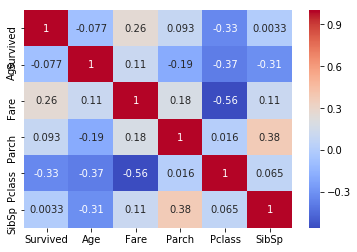

In [23]:
#finding the correlation using heatmap
sns.heatmap(dataset_training[['Survived', 'Age', 'Fare', 'Parch', 'Pclass', 'SibSp']].corr(), cmap='coolwarm', annot=True)

From the above plot we see that Fare has the high correlation with the survival probability

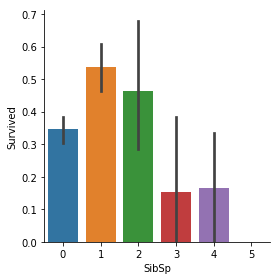

In [24]:
#univariate analysis
sns.factorplot(x='SibSp', y= 'Survived', data=dataset_training, kind='bar')

It seems that chance of survived is someone who has less Siblings

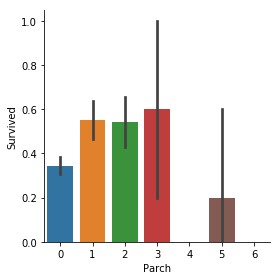

In [25]:
sns.factorplot(x='Parch', y='Survived', data=dataset_training, kind='bar')

It seems that less family size has high chance of survival

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


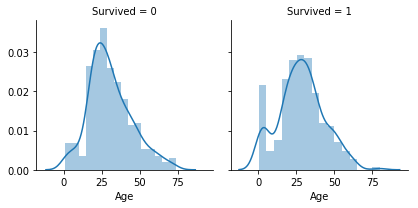

In [26]:
#AGE
%matplotlib inline
g = sns.FacetGrid(data=dataset_training, col='Survived')
g = g.map(sns.distplot, 'Age')

In [27]:
percent_missing =(dataset.isnull().sum()/dataset.isnull().count())*100
print(round(percent_missing, 2))

Age            19.71
Cabin          77.52
Embarked        0.15
Fare            0.08
Name            0.00
Parch           0.00
PassengerId     0.00
Pclass          0.00
Sex             0.00
SibSp           0.00
Survived       32.18
Ticket          0.00
dtype: float64


In [28]:
dataset['Fare'].isnull().sum()

1

Since Fare is missing only one so we can use median to fill that one

In [10]:
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

In [30]:
dataset['Fare'].isnull().sum()

0

That one NaN value in Fare gets filled

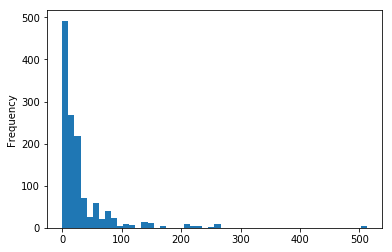

In [31]:
#Univariate analysis for Fare
dataset['Fare'].plot('hist', bins=50)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


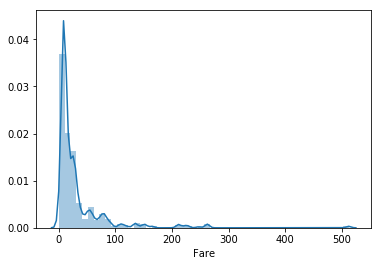

In [32]:
#
sns.distplot(dataset['Fare'])

from the above plot we can see the distribution of fare plot and it is skewed.

In [11]:
#
#trying log transformation
dataset['Fare'] = dataset['Fare'].map(lambda i: np.log(i) if i>0 else 0)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


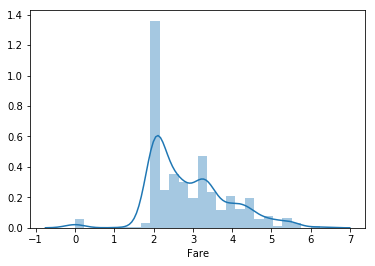

In [34]:
sns.distplot(dataset['Fare'])

Now we can see that the Fare data is normally distributed when compared to without log transformation

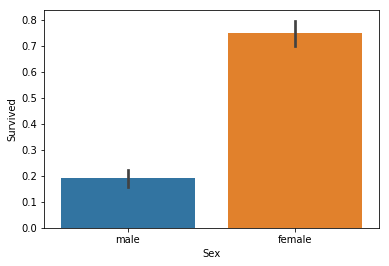

In [35]:
#Categorical variables
sns.barplot(x='Sex', y='Survived', data=dataset_training)

We can see that the Female survived more than Male

In [36]:
#
dataset_training[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


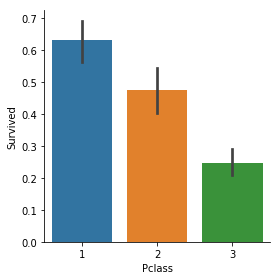

In [37]:
sns.factorplot(x='Pclass', y='Survived',data=dataset_training, kind='bar')

It shows that the Pclass 1 has high chances of survival when compared to lower class

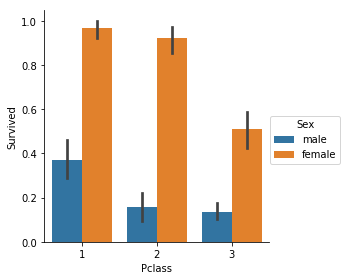

In [38]:
#
sns.factorplot(x='Pclass', y='Survived',hue= 'Sex',data=dataset_training, kind='bar')

Here also we can see that chances of survival for women is high.

In [39]:
#Embarked missing

dataset['Embarked'].isnull().sum()

2

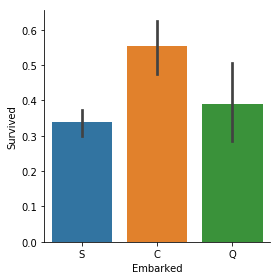

In [40]:
sns.factorplot(x='Embarked', y='Survived', data=dataset, kind='bar')

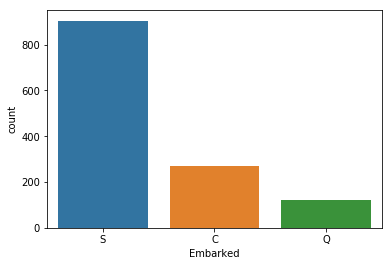

In [41]:
sns.countplot(x='Embarked', data=dataset)

We can see that the most of the people are from S but the probability of surviving in C is more which means the people who are from C is more likely to survived.

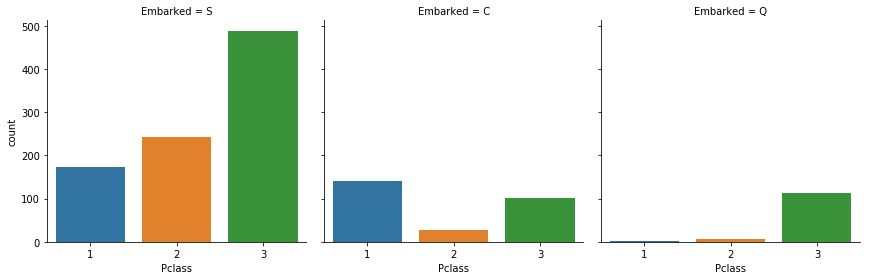

In [42]:
sns.factorplot('Pclass', col='Embarked', data=dataset, kind='count')

This plot shows that more people are from Embarked 'S', but the previous plot shows that most people survived are from Embarked C. 

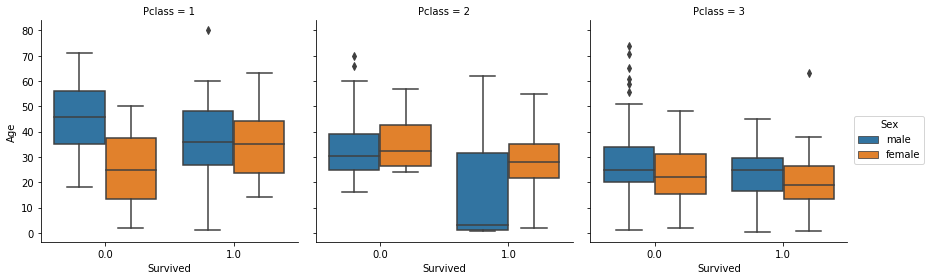

In [43]:
#Age
sns.factorplot(y='Age', x='Survived', hue='Sex', data=dataset, col='Pclass', kind='box')

from the above plot we can see that the in class 1 male aged between 28 to 52, female aged between 25 to 45 are able to survived.
In class 2, male aged between 3 to 28 and female between 25 to 35 are able to survived.
In class 3, male aged between 20 to 33 and female between 15 to 35 are able to survived.

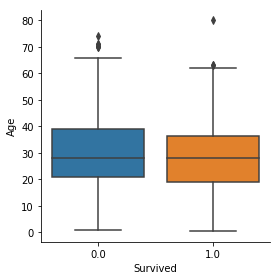

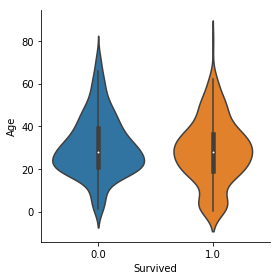

In [44]:
sns.factorplot(x='Survived', y='Age', data=dataset, kind='box')
sns.factorplot(x='Survived', y='Age', data=dataset, kind='violin')

we can see that the survived and non survived has same median values

In [12]:
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

In [46]:
dataset.isnull().sum()

Age               0
Cabin          1007
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

Now we can see that the age values has no missing values

In [47]:
#Cabin
dataset['Cabin'][dataset['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Since too many values missing in Cabin i am going to drop this column from the dataset

In [13]:
dataset.drop(labels=['Cabin'], axis=1, inplace=True)

In [14]:
dataset.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,2.085672,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


Now we can see that the dataset has no cabin feature

In [50]:
dataset.isnull().sum()

Age              0
Embarked         2
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [15]:
dataset = pd.get_dummies(data=dataset, columns=['Embarked'], prefix='Em')

In [16]:
dataset.isnull().sum()

Age              0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Em_C             0
Em_Q             0
Em_S             0
dtype: int64

Now we can see that there is no missing values in the dataset

In [53]:
dataset.head()

,Age,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Em_C,Em_Q,Em_S
0,22.0,1.981001,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,0,1
1,38.0,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,0,0
2,26.0,2.070022,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,0,1
3,35.0,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,0,0,1
4,35.0,2.085672,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,0,1


the name feature in the dataset doesn't going to give more information about survival. so drop the column of name as well

In [17]:
dataset.drop(labels=['Name'], axis=1, inplace=True)

In [55]:
dataset.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Em_C,Em_Q,Em_S
0,22.0,1.981001,0,1,3,male,1,0.0,A/5 21171,0,0,1
1,38.0,4.266662,0,2,1,female,1,1.0,PC 17599,1,0,0
2,26.0,2.070022,0,3,3,female,0,1.0,STON/O2. 3101282,0,0,1
3,35.0,3.972177,0,4,1,female,1,1.0,113803,0,0,1
4,35.0,2.085672,0,5,3,male,0,0.0,373450,0,0,1


In [18]:
#Sex
dataset = pd.get_dummies(data=dataset, columns=['Sex'], prefix='Sex')

In [19]:
#dropping dummy variable
dataset.drop(labels=['Sex_female'], axis=1, inplace=True)

In [18]:
dataset.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Em_C,Em_Q,Em_S,Sex_male
0,22.0,1.981001,0,1,3,1,0.0,A/5 21171,0,0,1,1
1,38.0,4.266662,0,2,1,1,1.0,PC 17599,1,0,0,0
2,26.0,2.070022,0,3,3,0,1.0,STON/O2. 3101282,0,0,1,0
3,35.0,3.972177,0,4,1,1,1.0,113803,0,0,1,0
4,35.0,2.085672,0,5,3,0,0.0,373450,0,0,1,1


In [19]:
dataset.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Em_C,Em_Q,Em_S,Sex_male
0,22.0,1.981001,0,1,3,1,0.0,A/5 21171,0,0,1,1
1,38.0,4.266662,0,2,1,1,1.0,PC 17599,1,0,0,0
2,26.0,2.070022,0,3,3,0,1.0,STON/O2. 3101282,0,0,1,0
3,35.0,3.972177,0,4,1,1,1.0,113803,0,0,1,0
4,35.0,2.085672,0,5,3,0,0.0,373450,0,0,1,1


We can imagine that large families will have more difficulties to evacuate, looking for theirs sisters/brothers/parents during the evacuation. So, i choosed to create a "Fsize" (family size) feature which is the sum of SibSp , Parch and 1 (including the passenger).

In [20]:
#Family size 
dataset['Fsize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [21]:
dataset.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Em_C,Em_Q,Em_S,Sex_male,Fsize
0,22.0,1.981001,0,1,3,1,0.0,A/5 21171,0,0,1,1,2
1,38.0,4.266662,0,2,1,1,1.0,PC 17599,1,0,0,0,2
2,26.0,2.070022,0,3,3,0,1.0,STON/O2. 3101282,0,0,1,0,1
3,35.0,3.972177,0,4,1,1,1.0,113803,0,0,1,0,2
4,35.0,2.085672,0,5,3,0,0.0,373450,0,0,1,1,1


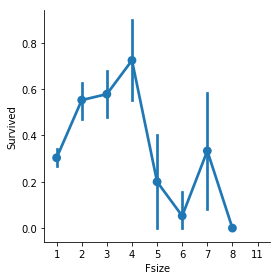

In [61]:
sns.factorplot(x='Fsize', y='Survived',data=dataset)

We can see that the higher the family size less chance to survive

In [21]:
#create of new feature of family size
dataset['Single'] = dataset['Fsize'].map(lambda s:1 if s==1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s:1 if s==2 else 0)
dataset['MediumF']= dataset['Fsize'].map(lambda s:1 if 3<= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s:1 if s>=5 else 0 )

In [63]:
dataset.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Em_C,Em_Q,Em_S,Sex_male,Fsize,Single,SmallF,MediumF,LargeF
0,22.0,1.981001,0,1,3,1,0.0,A/5 21171,0,0,1,1,2,0,1,0,0
1,38.0,4.266662,0,2,1,1,1.0,PC 17599,1,0,0,0,2,0,1,0,0
2,26.0,2.070022,0,3,3,0,1.0,STON/O2. 3101282,0,0,1,0,1,1,0,0,0
3,35.0,3.972177,0,4,1,1,1.0,113803,0,0,1,0,2,0,1,0,0
4,35.0,2.085672,0,5,3,0,0.0,373450,0,0,1,1,1,1,0,0,0


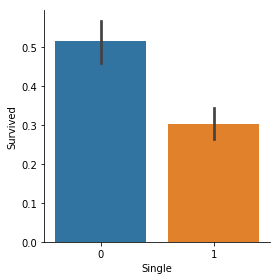

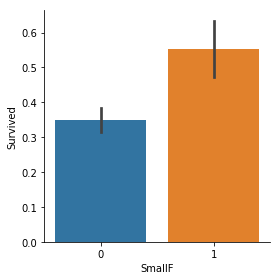

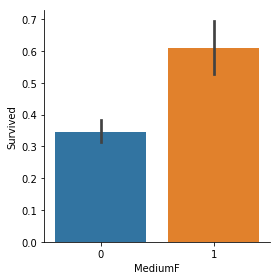

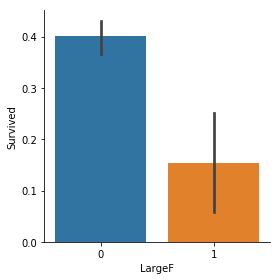

In [22]:
sns.factorplot(x='Single', y='Survived', data=dataset, kind='bar')
sns.factorplot(x='SmallF', y='Survived', data=dataset, kind='bar')
sns.factorplot(x='MediumF', y='Survived', data=dataset, kind='bar')
sns.factorplot(x='LargeF', y='Survived', data=dataset, kind='bar')


from this graph we can see that medium and small family size has high chance of survival

In [23]:
dataset.drop(labels=['Ticket'], axis=1, inplace=True)

In [24]:
dataset.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Em_C,Em_Q,Em_S,Sex_male,Fsize,Single,SmallF,MediumF,LargeF
0,22.0,1.981001,0,1,3,1,0.0,0,0,1,1,2,0,1,0,0
1,38.0,4.266662,0,2,1,1,1.0,1,0,0,0,2,0,1,0,0
2,26.0,2.070022,0,3,3,0,1.0,0,0,1,0,1,1,0,0,0
3,35.0,3.972177,0,4,1,1,1.0,0,0,1,0,2,0,1,0,0
4,35.0,2.085672,0,5,3,0,0.0,0,0,1,1,1,1,0,0,0


In [24]:
dataset.drop(labels=['PassengerId'], axis=1, inplace=True)

In [25]:
train = dataset[:len(dataset_training)]
train.shape

(881, 15)

In [26]:
test = dataset[len(dataset_training):]
test.shape

(418, 15)

In [28]:
test.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Em_C,Em_Q,Em_S,Sex_male,Fsize,Single,SmallF,MediumF,LargeF
881,34.5,2.057860,0,3,0,NaN,0,1,0,1,1,1,0,0,0
882,47.0,1.945910,0,3,1,NaN,0,0,1,0,2,0,1,0,0
883,62.0,2.270836,0,2,0,NaN,0,1,0,1,1,1,0,0,0
884,27.0,2.159003,0,3,0,NaN,0,0,1,1,1,1,0,0,0
885,22.0,2.508582,1,3,1,NaN,0,0,1,0,3,0,0,1,0


We can see survived column on the dataset and we can drop it

In [27]:
test.drop(labels=['Survived'], axis=1, inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
test.head()

,Age,Fare,Parch,Pclass,SibSp,Em_C,Em_Q,Em_S,Sex_male,Fsize,Single,SmallF,MediumF,LargeF
881,34.5,2.057860,0,3,0,0,1,0,1,1,1,0,0,0
882,47.0,1.945910,0,3,1,0,0,1,0,2,0,1,0,0
883,62.0,2.270836,0,2,0,0,1,0,1,1,1,0,0,0
884,27.0,2.159003,0,3,0,0,0,1,1,1,1,0,0,0
885,22.0,2.508582,1,3,1,0,0,1,0,3,0,0,1,0


In [28]:
X_test = test

In [29]:
train['Survived'] = train['Survived'].astype('int')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
y_train = train['Survived']

In [31]:
X_train = train.drop(labels=['Survived'], axis=1)

In [32]:
X_train.shape

(881, 14)

# Logistic Regression

In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_logistic_reg = LogisticRegression(random_state=0)
classifier_logistic_reg.fit(X_train, y_train)
y_pred_logistic_reg = classifier_logistic_reg.predict(X_test)

In [43]:
print(round(classifier_logistic_reg.score(X_train, y_train)*100, 2))

81.04


In [38]:
#cross validation of logistic regression
from sklearn.model_selection import cross_val_score
cv_logistic_reg = cross_val_score(estimator=classifier_logistic_reg, X=X_train, y=y_train, cv=10)

In [39]:
#Mean accuracy of logistic regression
cv_logistic_reg.mean()

0.8081460674157304

In [40]:
#Standard deviation of logistic regression
cv_logistic_reg.std()

0.02953802668695778

# KNN

In [44]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors=29, metric='minkowski', p=2)
classifier_KNN.fit(X_train, y_train)
y_pred_KNN = classifier_KNN.predict(X_test)

In [61]:
print(round(classifier_KNN.score(X_train, y_train)*100, 2))

74.8


In [46]:
#cross validation of KNN
cv_KNN = cross_val_score(estimator=classifier_KNN, X=X_train, y=y_train, cv=10)

In [47]:
#mean accuracy of KNN
cv_KNN.mean()

0.7049540347293156

In [48]:
#standard deviation of KNN
cv_KNN.std()

0.05180145042436069

# Support Vector Machines

In [49]:
#SVM
from sklearn.svm import SVC
classifier_SVM = SVC(kernel='linear', random_state=0)
classifier_SVM.fit(X_train, y_train)
y_pred_SVM = classifier_SVM.predict(X_test)

In [62]:
print(round(classifier_SVM.score(X_train, y_train)*100, 2))

80.36


In [51]:
#cross validation of SVM
cv_SVM = cross_val_score(estimator=classifier_SVM, X=X_train, y=y_train, cv=10)

In [52]:
#mean accuracy of SVM
cv_SVM.mean()

0.8036133810010215

In [53]:
#standard deviation of SVM
cv_SVM.std()

0.021738877822281236

# Kernel SVM

In [54]:
#Kernel SVM
from sklearn.svm import SVC
classifier_KSVM = SVC(kernel='rbf', random_state=0)
classifier_KSVM.fit(X_train, y_train)
y_pred_KSVM = classifier_KSVM.predict(X_test)

In [63]:
print(round(classifier_KSVM.score(X_train, y_train)*100, 2))

84.9


In [56]:
#cross validation of Kernel SVM
cv_KSVM = cross_val_score(estimator=classifier_KSVM, X=X_train, y=y_train, cv=10)

In [57]:
#mean of Kernel SVM
cv_KSVM.mean()

0.7945607763023494

In [58]:
#standard deviation of Kernel SVM
cv_KSVM.std()

0.04042592640100208

# Naive Bayes

In [59]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

In [64]:
print(round(classifier_NB.score(X_train, y_train)*100, 2))

76.84


In [106]:
#cross validation of Naive Bayes
cv_NB = cross_val_score(estimator=classifier_NB, X=X_train, y=y_train, cv=10)

In [107]:
#mean accuracy of Naive Bayes
cv_NB.mean()

0.7560776302349336

In [108]:
#standard deviation of Naive Bayes
cv_NB.std()

0.06606478605107517

# Naive Bayes

In [65]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [66]:
print(round(classifier_DT.score(X_train, y_train)*100, 2))

97.96


In [67]:
#cross validation of Decision Tree
cv_DT = cross_val_score(estimator=classifier_DT, X=X_train, y=y_train, cv=10)

In [68]:
#mean accuracy of Decision tree
cv_DT.mean()

0.7923008171603678

In [112]:
#standard deviation of Decision Tree
cv_DT.std()

0.04971268221516714

# Random Forest

In [69]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [70]:
print(round(classifier_RF.score(X_train, y_train)*100, 2))

97.96


In [71]:
#cross validation of Random Forest
cv_RF = cross_val_score(estimator=classifier_RF, X=X_train, y=y_train, cv=10)

In [72]:
#mean accuracy of Random Forest
cv_RF.mean()

0.8048263534218589

In [125]:
#standard deviation of Random Forest
cv_RF.std()

0.040541587818283244

# Ada Boost

In [33]:
from sklearn.ensemble import AdaBoostClassifier
classifier_AB = AdaBoostClassifier()
classifier_AB.fit(X_train, y_train)
y_pred_AB = classifier_AB.predict(X_test)

In [34]:
accuracy_classifier_AB = round(classifier_AB.score(X_train, y_train)*100, 2)
accuracy_classifier_AB

82.29

In [39]:
#cross validation
cv_classifier_AB = cross_val_score(estimator=classifier_AB, X=X_train, y=y_train, scoring='accuracy', cv=10)
print('best_accuracy %4f:' %cv_classifier_AB.mean())
print('best_std %4f:' %cv_classifier_AB.std())

best_accuracy 0.804775:
best_std 0.027205:


# Gradient Boosting Machine

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_GBM = GradientBoostingClassifier()
classifier_GBM.fit(X_train, y_train)
y_pred_GBM = classifier_GBM.predict(X_test)

In [41]:
accuracy_classifier_GBM = round((classifier_GBM.score(X_train, y_train)*100), 2)
accuracy_classifier_GBM

90.81

In [42]:
#cross validation
cv_classifier_GBM = cross_val_score(estimator=classifier_GBM, X=X_train, y=y_train, scoring='accuracy', cv=10)
print('best_accuracy %4f:' %cv_classifier_GBM.mean())
print('best_std %4f:' %cv_classifier_GBM.std())

best_accuracy 0.825204:
best_std 0.039071:


From all of the classifier Random Forest looks quite good so we can tune the hyperparameters of Random Forest classifier

# Hyper Parameter tuning

In [138]:
from sklearn.grid_search import GridSearchCV
parameters = [
    {
       'n_estimators' : [100, 200, 500, 1000],
        'criterion'  : ['gini', 'entropy'],
        'min_samples_split' : [2,5,10],
        'min_samples_leaf' : [1,2,4]
    }
]

In [139]:
grid_search = GridSearchCV(estimator =classifier_RF, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)

In [140]:
grid_search.fit(X_train, y_train)
best_accuracy_RF = grid_search.best_score_
best_accuracy_RF

0.8263337116912599

In [142]:
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [145]:
best_classifier = RandomForestClassifier(criterion='gini', min_samples_leaf=2, min_samples_split=2, n_estimators=100)
best_classifier.fit(X_train, y_train)
y_pred_best = best_classifier.predict(X_test)

In [146]:
y_pred_best

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,